In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
valeurs_vide=df.isnull().sum()
valeurs_vide

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
#rempli les cases vides par 29 la moyenne
df['Age']=df['Age'].fillna(29)
df['Embarked']= df['Embarked'].mode()[0]

In [144]:
valeurs_vide=df.isnull().sum()
valeurs_vide

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [113]:
# suppression des colonnes inutiles
drop_cols=['PassengerId', 'Ticket', 'Cabin']
for x in drop_cols :
    df.drop(x, inplace=True, axis=1)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,S


In [114]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
# detection du nombre de valeurs manquantes
import pandas as pd
df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Age_Group    0
dtype: int64

In [122]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
# Afficher les premières lignes
print(df.head())

# print caracteristics (x) and the target (y)
X=df.drop(columns=['Survived'])
y=(df['Survived'])  # this is a binary transformation

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_Group  
0    male  22.0      1      0   7.2500        S    adulte  
1  female  38.0      1      0  71.2833        S    adulte  
2  female  26.0      0      0   7.9250        S    adulte  
3  female  35.0      1      0  53.1000        S    adulte  
4    male  35.0      0      0   8.0500        S    adulte  


In [124]:
# division du dataset en ensemble de test et d'entrainement
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Size of the train set: {X_train.shape}")
print(f"Size of the train set: {X_test.shape}")

Size of the train set: (712, 9)
Size of the train set: (179, 9)


In [125]:
# Encodage, Standardisation, Entrainement
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Identifier les colonnes numériques et catégorielles
numeric_features = ['Pclass','Age',	'SibSp', 'Parch','Fare' ]
categorical_features = ['Name',	'Sex', 'Embarked']

# Pipeline pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardiser les colonnes numériques
])

# Pipeline pour les colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encoder les colonnes catégorielles
])

# Combiner les transformations avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Appliquer les transformations sur X_train et X_test
X_train_transformed = preprocessor.fit_transform(X_train)  # Apprendre à partir de l'entraînement
X_test_transformed = preprocessor.transform(X_test)       # Transformer uniquement

# Vérifier la transformation
print("X_train après transformation :\n", X_train_transformed.toarray())
print("X_test après transformation :\n", X_test_transformed.toarray())

X_train après transformation :
 [[-1.61413602  1.23967253 -0.47072241 ...  0.          1.
   1.        ]
 [-0.40055118 -0.49287069 -0.47072241 ...  0.          1.
   1.        ]
 [ 0.81303367  0.20014659 -0.47072241 ...  0.          1.
   1.        ]
 ...
 [ 0.81303367  0.89316388  1.23056874 ...  0.          1.
   1.        ]
 [-1.61413602 -1.18588798  0.37992316 ...  1.          0.
   1.        ]
 [-1.61413602 -0.64687454 -0.47072241 ...  0.          1.
   1.        ]]
X_test après transformation :
 [[ 0.81303367 -0.03085917  0.37992316 ...  0.          1.
   1.        ]
 [-0.40055118  0.12314467 -0.47072241 ...  0.          1.
   1.        ]
 [ 0.81303367 -0.72387646 -0.47072241 ...  0.          1.
   1.        ]
 ...
 [ 0.81303367  0.66215812  0.37992316 ...  1.          0.
   1.        ]
 [-0.40055118 -0.95488222 -0.47072241 ...  1.          0.
   1.        ]
 [ 0.81303367 -1.95590719  0.37992316 ...  1.          0.
   1.        ]]


Meilleur nombre de voisins : 23
Meilleur score de validation : 0.83141627543036
Précision sur le test : 0.7877094972067039


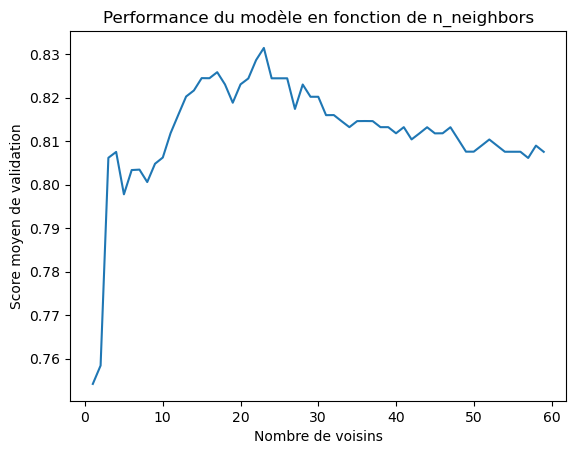

In [145]:
#############                    Prediction en utilisant le l'algorithme KNN                         ###############
# recherche du meilleur nombre de voisin pour optimiser le modèle
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Définir la grille des hyperparamètres
param_grid = {'n_neighbors': range(1, 60)}

# Configurer la recherche d'hyperparamètres
grid = GridSearchCV(
    KNeighborsClassifier(metric='euclidean', weights='distance'), 
    param_grid, 
    cv=10,  # Utiliser 10 folds pour plus de fiabilité
    scoring='accuracy',  # Utiliser la précision comme métrique
    refit=True  # Ajuster automatiquement le meilleur modèle
)

# Entraîner GridSearchCV
grid.fit(X_train_transformed, y_train)

# Meilleur paramètre et meilleur modèle
print("Meilleur nombre de voisins :", grid.best_params_['n_neighbors'])
print("Meilleur score de validation :", grid.best_score_)

# Utiliser le meilleur modèle pour faire des prédictions
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_transformed)
print("Précision sur le test :", accuracy_score(y_test, y_pred))

# Tracer les scores de validation
results = grid.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_test_score'])
plt.xlabel('Nombre de voisins')
plt.ylabel('Score moyen de validation')
plt.title('Performance du modèle en fonction de n_neighbors')
plt.show()

In [146]:
# prediction en utilisant le KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=23)  
knn.fit(X_train_transformed, y_train)

y_pred_knn = knn.predict(X_test_transformed)

print(y_pred_knn)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [147]:
# les metriques d'évaluation du modéle KNN
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

Accuracy : 0.78
precision : 0.77
recall : 0.68
F1-Score : 0.72


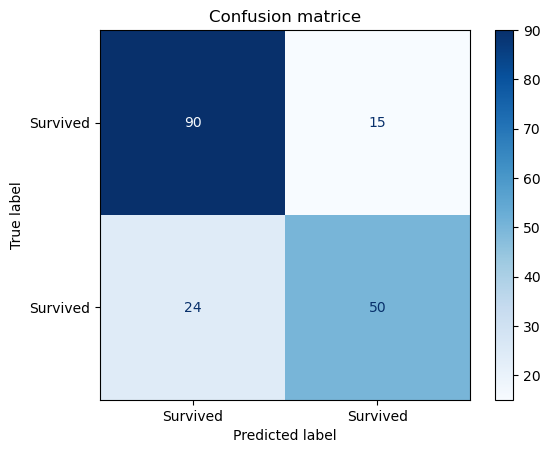

In [148]:
# confusion matrice
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion matrice')
plt.show()

In [130]:
# création du tableau récapitulatif
recap_knn = x_test.copy()  # Copie du DataFrame x_test

# Ajout de la colonne "real"
recap_knn["real"] = y_test

# Ajout de la colonne "Prediction"
recap_knn['Prediction'] = y_pred_knn

recap_knn

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,real,Prediction
709,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.0,1,1,15.2458,C,1,0
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,10.5000,S,0,0
840,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,7.9250,S,0,0
720,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,33.0000,S,1,1
39,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417,C,1,0
...,...,...,...,...,...,...,...,...,...,...
433,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,7.1250,S,0,0
773,3,"Elias, Mr. Dibo",male,29.0,0,0,7.2250,C,0,0
25,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,1,0
84,2,"Ilett, Miss. Bertha",female,17.0,0,0,10.5000,S,1,1


In [131]:
# Exportation du resultat vers un fichier de prediction
recap_knn.to_csv('./recap_KNN.csv', index=False)

In [132]:
#############                    Prediction en utilisant le l'algorithme  logistic regression          ###############
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(random_state=42)

# Entraîner le modèle avec l'ensemble d'entraînement
model.fit(X_train_transformed, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lr = model.predict(X_test_transformed)

# Afficher les prédictions
print("Prédictions : ", y_pred_lr)

Prédictions :  [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [133]:
# les metriques d'évaluation du modéle avec le logistic regression
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy : {accuracy:.2f}")
print(f"precision : {precision:.2f}")
print(f"recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

Accuracy : 0.80
precision : 0.78
recall : 0.72
F1-Score : 0.75


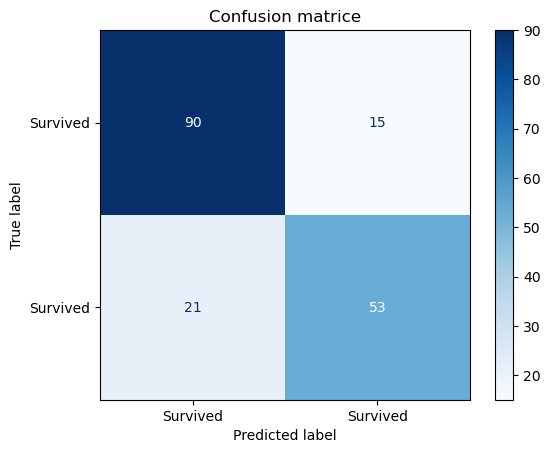

In [134]:
# confusion matrice
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion matrice')
plt.show()

In [135]:
# création du tableau récapitulatif
recap_lr = x_test.copy()  # Copie du DataFrame x_test

# Ajout de la colonne "real"
recap_lr["real"] = y_test

# Ajout de la colonne "Prediction"
recap_lr['Prediction'] = y_pred_lr

recap_lr

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,real,Prediction
709,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.0,1,1,15.2458,C,1,0
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,10.5000,S,0,0
840,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,7.9250,S,0,0
720,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,33.0000,S,1,1
39,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417,C,1,1
...,...,...,...,...,...,...,...,...,...,...
433,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,7.1250,S,0,0
773,3,"Elias, Mr. Dibo",male,29.0,0,0,7.2250,C,0,0
25,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,1,0
84,2,"Ilett, Miss. Bertha",female,17.0,0,0,10.5000,S,1,1


In [136]:
# Exportation du resultat vers un fichier de prediction
recap_lr.to_csv('./recap_lr.csv', index=False)